# ▶ 버스정류장 위치와 Google Map을 활용하여 wifi 환경 보완
- **버스가 많이 정거하는 버스 정류장을 군집화(Clustering)하여 그 중심(centroid) 탐색**

## 프로젝트 착수 배경
- **버스를 타고 이동할 때, wifi 신호가 약해지는 문제점을 보완하기 위해 프로젝트를 시작함**
- 현재 wifi는 버스가 많이 정거하는 정류장에 설치되어 있음(아래 그림과 같이)
![Alt Text](wifi.png)
- **문제점 : 버스가 정류장에서 멀어지는 순간 wifi 신호가 약해짐**
- 이 문제점을 보완하기 위해 **정류장을 군집화하고 그 군집의 중심**에 wifi 중계기나 광대역 wifi를 추가적으로 설치하여 이 문제를 풀어보려 함

# 1. Data 수집

## 버스 정보 가져오기

- [서울시 대중교통정보](http://m.bus.go.kr/mBus/)
- 버스 정류장에 대한 정보를 json 형태로 제공하는 웹 페이지 활용
- 버스 번호를 호출하면 이 버스가 다니는 버스 정류장의 좌표를 얻을 수 있음
- 서울시 지선 및 간선 버스 번호는 총 366개
- 간선 버스는 지역간 중, 장거리를 운행 할 목적으로 운행하는 버스 노선의 형태
- 지선버스는 원거리를 운행하지 않으며, 간선버스의 역할을 보완하고 특정 지역 내에서의 이동성을 확보하기 위하여 운행하는 버스 노선의 형태

In [1]:
df = pd.DataFrame(columns=["busno", "busid", "stationid", "stationnm", "x", "y"])

In [2]:
df

,busno,busid,stationid,stationnm,x,y


In [3]:
import urllib2, urllib
import json

def get_businfo(busno):
    parameters = {}
    parameters['strSrch'] = busno
    target = 'http://m.bus.go.kr/mBus/bus/getBusRouteList.bms'

    parameters = urllib.urlencode(parameters)
    
    while True:
        handler = urllib2.urlopen(target, parameters)
        if handler.code < 400:
            f = handler.read()
            j = json.loads(f.decode('cp949'))
            try:
                return j["resultList"][0]["busRouteId"]
            except:
                return None

# data 프레임에 넣기
def get_busroute(busno):
    routeid = get_businfo(busno)
    if not routeid:
        return 
    parameters = {}
    parameters['busRouteId'] = routeid
    target = 'http://m.bus.go.kr/mBus/bus/getRouteAndPos.bms'
    
    parameters = urllib.urlencode(parameters)
    
    while True:
        handler = urllib2.urlopen(target, parameters)
        if handler.code < 400:
            f = handler.read()
            j = json.loads(f.decode('cp949'))
            routes = j["resultList"]
            for route in routes:
                busRouteNm = route['busRouteNm']
                busRouteId = route['busRouteId']
                stationNm = route['stationNm']
                stationNo = route['stationNo']
                x = route['gpsX']
                y = route['gpsY']
                df.loc[len(df)] = [busRouteNm.encode('utf-8'), busRouteId.encode('utf-8'), stationNo.encode('utf-8'), stationNm.encode('utf-8'), x.encode('utf-8'), y.encode('utf-8')]
#               print(busRouteNm.encode('utf-8'), busRouteId.encode('utf-8'), stationNo.encode('utf-8'), stationNm.encode('utf-8'), x.encode('utf-8'), y.encode('utf-8'))
#               l = '\t'.join([busRouteNm, busRouteId, stationNo, stationNm, x, y])
#               l = '\t'.join(list(route.values()))
#               print(l.encode('utf-8'))
            break

def get_busroute_keys(busno):
    routeid = get_businfo(busno)
    parameters = {}
    parameters['busRouteId'] = routeid
    target = 'http://m.bus.go.kr/mBus/bus/getRouteAndPos.bms'
    
    parameters = urllib.urlencode(parameters)
    
    while True:
        handler = urllib2.urlopen(target, parameters)
        if handler.code < 400:
            f = handler.read()
            j = json.loads(f.decode('cp949'))
            route = j["resultList"][0]
            print(','.join(list(route.keys())))
            break

In [4]:
get_businfo('420')

u'100100068'

In [5]:
get_busroute_keys('420')

vehList,seq,stationNo,stationNm,busRouteId,existYn,section,busType,sectSpdCol,station,lastTm,transYn,direction,busRouteNm,fullSectDist,routeType,gpsX,gpsY,trnstnid,sectSpd,beginTm,arsId


## 버스 번호 Dataset
- 버스 번호는 서울교통정보과에서 dataset을 내려받아 사용
- [서울교통정보과](http://topis.seoul.go.kr/renewal/traffic/BusInfo.jsp)

![Alt Text](busline.png)

In [6]:
# get_busroute('420')

def main():

#    busnos = ['0017']
    busnos = ['0017', '102', '106', '107', '108', '109', '120', '121', '130', '140', '141', '142', '143', '144', '145', '146', '146', '147', '148', '150', '151', '152', '153', '160', '162', '163', '171', '172', '201', '202', '240', '241', '242', '260', '261', '262', '262', '270', '271', '272', '273', '301', '302', '303', '320', '333', '340', '341', '350', '351', '360', '362', '370', '370', '400', '401', '402', '405', '406', '407', '420', '421', '440', '441', '461', '462', '463', '470', '471', '472', '500', '501', '502', '503', '504', '505', '506', '507', '540', '541', '542', '571', '600', '601', '602', '603', '604', '605', '606', '640', '641', '642', '643', '650', '651', '652', '653', '653', '661', '662', '670', '670', '672', '673', '700', '701', '703', '704', '705', '706', '707', '710', '720', '721', '740', '751', '752', '753', '760', '771', '1014', '1017', '1020', '1111', '1113', '1114', '1115', '1119', '1120', '1122', '1124', '1126', '1127', '1128', '1129', '1130', '1131', '1132', '1133', '1135', '1136', '1137', '1138', '1139', '1140', '1140', '1141', '1142', '1143', '1144', '1154', '1155', '1156', '1157', '1161', '1162', '1164', '1165', '1166', '1213', '1213', '1218', '1221', '1222', '1224', '1224', '1226', '1227', '1711', '2012', '2013', '2014', '2015', '2016', '2016', '2112', '2113', '2114', '2115', '2211', '2221', '2222', '2224', '2227', '2230', '2233', '2234', '2235', '2311', '2412', '2413', '2415', '3011', '3011', '3012', '3012', '3012', '3212', '3214', '3216', '3217', '3220', '3313', '3314', '3315', '3316', '3317', '3318', '3318', '3319', '3321', '3321', '3322', '3411', '3412', '3413', '3414', '3416', '3417', '3422', '3425', '3426', '4211', '4212', '4319', '4319', '4412', '4419', '4432', '4433', '4435', '5012', '5413', '5511', '5513', '5515', '5516', '5517', '5519', '5523', '5524', '5525', '5528', '5530', '5531', '5534', '5535', '5536', '5537', '5615', '5616', '5617', '5618', '5619', '5620', '5621', '5623', '5624', '5625', '5626', '5627', '5630', '5633', '5712', '5713', '5714', '6211', '6411', '6511', '6512', '6513', '6514', '6515', '6516', '6611', '6613', '6614', '6616', '6617', '6620', '6623', '6624', '6625', '6627', '6628', '6629', '6630', '6631', '6632', '6635', '6637', '6638', '6642', '6643', '6645', '6647', '6648', '6649', '6650', '6651', '6657', '6712', '6714', '6715', '6716', '7011', '7016', '7017', '7018', '7019', '7021', '7022', '7024', '7025', '7211', '7211', '7212', '7611', '7612', '7613', '7711', '7713', '7714', '7715', '7719', '7720', '7722', '7723', '7726', '7727', '7728', '7730', '7733', '7733', '7737', '7738', '7739', '110A', '110B', '2312A', '2312A', '2312B', '2312B', '4318', '5522A', '5522B', '6640A', '6640B', '7013A', '7013B', '702A', '702B', '750A', '750B']
    for busno in busnos:
        get_busroute(busno)
#       print(busno, busid, stationid, station, x, y);
        
# if __name__ == '__main__':
#     main()

In [7]:
main()

In [8]:
df.head()

,busno,busid,stationid,stationnm,x,y
0,0017,100100124,03689,청암자이아파트,126.946517,37.534363
1,0017,100100124,03298,청암동강변삼성아파트,126.949304,37.533961
2,0017,100100124,03321,청심경로당,126.950449,37.533744
3,0017,100100124,03304,원효2동주민센터,126.950904,37.534278
4,0017,100100124,03306,산천동,126.953984,37.53542


In [9]:
df.to_csv('bus1.csv', encoding="utf-8")

In [10]:
# index_col=0을 하면 Unnamed: 0 안뜸!!
df1 = pd.read_csv('bus1.csv', index_col=0, encoding="utf-8")

In [11]:
df1.head()

,busno,busid,stationid,stationnm,x,y
0,0017,100100124,03689,청암자이아파트,126.946517,37.534363
1,0017,100100124,03298,청암동강변삼성아파트,126.949304,37.533961
2,0017,100100124,03321,청심경로당,126.950449,37.533744
3,0017,100100124,03304,원효2동주민센터,126.950904,37.534278
4,0017,100100124,03306,산천동,126.953984,37.535420


# 2. google map 파일(html) 출력

- [Google map](https://developers.google.com/maps/?hl=ko)을 활용하여 **지도**로 시각화
- Google map marker에 GPS 좌표를 넣어 지도에 표시
- GPS 좌표를 Google map의 marker에 넣기 위해 DataFrame에 있는 좌표를 자바스크립트의 Google map marker로 변환

In [12]:
from string import Template

colors = ["FF0000", "00FF00", "0000FF", "FFFF00", "FF00FF", "00FFFF", "000000",
          "800000", "008000", "000080", "808000", "800080", "008080", "808080",
          "C00000", "00C000", "0000C0", "C0C000", "C000C0", "00C0C0", "C0C0C0",
          "400000", "004000", "000040", "404000", "400040", "004040", "404040",
          "200000", "002000", "000020", "202000", "200020", "002020", "202020",
          "600000", "006000", "000060", "606000", "600060", "006060", "606060",
          "A00000", "00A000", "0000A0", "A0A000", "A000A0", "00A0A0", "A0A0A0",
          "E00000", "00E000", "0000E0", "E0E000", "E000E0", "00E0E0", "E0E0E0"]

In [13]:
def generate_busstops(df):
    coos = ',\n'.join(['new google.maps.LatLng(%s, %s)' %(r['y'] ,r['x']) for i, r in df.iterrows()])
    return 'var busstops = [{0}];'.format(coos)

In [14]:
# generate_busstops(df1)

In [15]:
def generate_polyline(valname, df1, idx=0):
    coos = ',\n'.join(['new google.maps.LatLng(%s, %s)' %(r['y'] ,r['x']) for i, r in df1.iterrows()])
    valcoos =  'var {0} = [{1}];'.format(valname, coos)
    
    polyline_template = """
                        {0}
                        var {1}_ = new google.maps.Polyline({{
                        path: {1},
                        strokeColor: "#{2}",
                        strokeOpacity: 0.8,
                        strokeWeight: 3
                        }});
                        {1}_.setMap(map);"""
    
    return polyline_template.format(valcoos, valname, colors[idx])

# data = {'busstops': busstops, 'busroutes':busroutes}
def generate_template_html(data, outfilename='busmap.html'):
    infile = open('map_temp.html')
    template = Template(infile.read())
    map_html = template.substitute(data)
    outfile = open(outfilename, 'w')
    outfile.write(map_html)

# 3. 버스 정류장을 Google map으로 시각화

In [16]:
df1.shape

(27381, 6)

In [17]:
bus = df1

- 정류장id가 0인 것 제거
- 미정차 제거
- id = 35331(은평공영차고지) 차고지인 것 제거

In [18]:
bus_df = bus[bus['stationid']!='0']
bus_df = bus_df[bus_df['stationid']!=u'미정차']
bus_df = bus_df[bus_df['stationid']!='35331']
bus_df.shape

(27005, 6)

### 27,005개 정류장을 모두 표시 할 수 없으니 **200개**만 샘플링
- **Google map**으로 다음과 같은 **시각화**

In [19]:
sampling_bus = bus_df.loc[np.random.permutation(bus_df.index)[:200]]
busstops = generate_busstops(sampling_bus)
    
data = {'busstops': busstops, 'busroutes': ''}
generate_template_html(data, 'all_busstop.html')

![Alt Text](sample_200.png)

## 신사역(22016)을 지나는 버스 시각화

- **신사역 버스 정류장(22016)을 지나는 버스**

In [20]:
s_df = df1

sin_df = s_df[s_df['stationid']!='0']
sin_df = sin_df[sin_df['stationid']!=u'미정차']
sin_df = sin_df[sin_df['stationid']!='35331']
sin_df = sin_df[sin_df['stationid']=='22016']

station_df = sin_df.drop_duplicates(cols='busno', take_last=True)

C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: the 'cols' keyword is deprecated, use 'subset' instead


- **신사역 버스 정류장(22016)을 지나는 각 버스의 노선**

In [21]:
busstops = generate_busstops(station_df.drop_duplicates(cols='stationid', take_last=True))
print(busstops)
busroutes = ''
i = 0
for idx, row in station_df.iterrows():
    route = s_df[s_df['busno']==row['busno']]
#     print(route)
    busroutes += generate_polyline('poly' + str(i), route, i)
    i += 1
    
data = {'busstops': busstops, 'busroutes': busroutes}
generate_template_html(data, 'bus.html')

var busstops = [new google.maps.LatLng(37.51293, 127.020642)];


C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
  if __name__ == '__main__':
C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: the 'cols' keyword is deprecated, use 'subset' instead
  if __name__ == '__main__':


![Alt Text](sinsa.png)

# 4. 버스가 많이 정거하는 버스 정류장 찾기

- DataFrame의 value_counts() : 각 열의 빈도수를 계산
- 버스 정거장 id의 빈도수를 구해 일정 빈도수 이상의 버스 정류장을 선택
- 버스가 공통으로 8번 이상 정거하는 정거장을 찾고 중복된 id 제거

In [22]:
busstop_df = bus_df.drop_duplicates(cols='stationid', take_last=True)
count = bus_df['stationid'].value_counts()
d = pd.DataFrame([count.index, count.values])
d1 = d.T
d1.columns = ['stationid', 'count']
bus_df = pd.merge(busstop_df, d1, on='stationid')
bus_df.sort('count', ascending=False)

C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
  if __name__ == '__main__':
C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: the 'cols' keyword is deprecated, use 'subset' instead
  if __name__ == '__main__':
C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,busno,busid,stationid,stationnm,x,y,count
3465,3220,100100218,06114,서울성심병원,127.050790,37.584670,24
7193,4318,100100237,22020,고속터미널,127.003841,37.505637,20
7641,750B,100100565,03012,갈월동,126.971691,37.549579,19
7633,750B,100100565,13010,서대문우체국,126.932076,37.561792,19
1158,6500,124000009,22014,논현역,127.023755,37.506324,19
7279,4318,100100237,22019,고속터미널,127.005263,37.506335,18
7582,702B용두초교,100100105,02127,북창동.남대문시장,126.981176,37.561901,18
2289,1165,100100172,09012,미아사거리역,127.030240,37.612897,18
1157,6500,124000009,22012,지하철2호선.강남역,127.026418,37.500757,18
4125,4319,100100427,24154,잠실종합운동장,127.072768,37.510652,18


In [23]:
bus_df['count'] = bus_df['count'].astype(float)
bus_df.describe()

,busid,x,y,count
count,7.697000e+03,7697.000000,7697.000000,7697.000000
mean,1.004165e+08,126.986615,37.553550,3.508510
std,2.524257e+06,0.101548,0.078489,2.969126
min,1.001000e+08,126.450537,37.302407,1.000000
25%,1.001002e+08,126.908533,37.499572,1.000000
50%,1.001003e+08,127.003000,37.550866,3.000000
75%,1.001004e+08,127.065776,37.603541,5.000000
max,1.240000e+08,127.233415,37.852880,24.000000


In [24]:
bus_df['count'].value_counts()

1     2330
2     1456
3     1058
4      832
5      508
6      467
7      296
8      236
9      124
10     109
11      78
12      45
13      43
14      38
16      28
15      20
17      17
18       7
19       3
20       1
24       1
Name: count, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17BA0EF0>]], dtype=object)

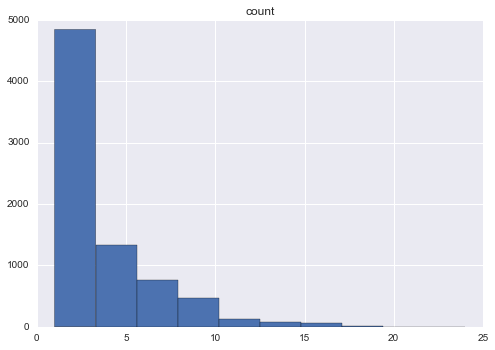

In [25]:
bus_df.hist(column=['count'])

- 버스가 많이 정거하는 버스 정거장의 기준을 **8(전체 정거장의 상위 10%)**로 정하고, **버스가 8번 이상 지나는 정거장을 추출함** 

In [26]:
c_df = df1

cl_df = c_df[c_df['stationid']!='0']
cl_df = cl_df[cl_df['stationid']!=u'미정차']
cl_df = cl_df[cl_df['stationid']!='35331']  # 은평공영차고지 제거

N = 8

stops = cl_df['stationid'].value_counts()
d = stops[stops > N].index.values.tolist()
cl_df = cl_df[cl_df['stationid'].isin(d)]
busstop_df = cl_df.drop_duplicates(cols='stationid', take_last=True)
busstop_df

C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: the 'cols' keyword is deprecated, use 'subset' instead


,busno,busid,stationid,stationnm,x,y
2371,160,100100033,10011,도봉보건소,127.040748,37.658942
2372,160,100100033,10013,도봉구민회관,127.038155,37.654567
2373,160,100100033,10015,쌍문역,127.034752,37.648824
2374,160,100100033,10017,우이1교앞,127.032652,37.645293
2472,160,100100033,09002,수유3동우체국,127.028631,37.640697
2473,160,100100033,10018,우이1교앞,127.032464,37.644663
2474,160,100100033,10016,쌍문역,127.034483,37.648063
2475,160,100100033,10014,도봉구민회관,127.038064,37.654070
2476,160,100100033,10012,도봉보건소.북한산아이파크아파트,127.040545,37.658272
7154,471,100100074,22002,교육개발원입구,127.038676,37.477767


### 8번 이상 지나는 버스 정류장 시각화

In [27]:
busstops = generate_busstops(busstop_df)
busroutes = ''
data = {'busstops': busstops, 'busroutes': busroutes}
generate_template_html(data, 'busstop_8.html')

![Alt Text](busstop_8.png)

# 5. 버스가 많이 정차하는 버스 정거장을 군집화(Clustering)

### 1. 위치 정보로 군집화하기(Clustering)
- **최적의 군집의 수 찾기(best_cluster)**

### kmeans의 평가 방법
#### 최적의 k값(best_cluster)를 구하는 것은 kmeans의 성능과 연관, 크게 두 가지로 나누면 target이 있을 경우와 target이 없을 경우
1. target이 존재
 - 군집의 실제값이 있는 것이기 때문에 좀 더 정확하게 평가 가능
 - Homogeneity, Completeness, V-measure등이 대표적인 방법
 - Homogeneity은 0.0에서 1.0까지(큰 값이 좋다)이며 1.0은 각 군집들이 각 범주의 데이터 점들만을 포함
 - Completeness는 주어진 범주의 모든 데이터 점이 같은 군집 내에 있는 것을 나타냄
 - V-measure = Homogeneity와 Completeness의 조합 평균
2. target이 없다면 Sihouette coefficient를 사용
 - Sihouette coefficient는 a, b를 사용하는데 의미는 다음과 같다.
 - a : 같은 군집 내의 인스턴스와 다른 모든 인스턴스 간 거리의 평균 
 - b : 군집 내의 인스턴스와 가장 인접한 다른 군집내의 모든 인스턴스간 거리의 평균
 - Sihouette coefficient = b - a / max(a, b)

#### 버스번호(busno)를 목적변수로 사용하여 v-measure_score 함수 사용
- 버스정거장에 대한 정확한 목적 변수는 없지만, 버스번호(busno)는 버스의 출발 지역과 종착 지역을 바탕으로 만들었기 때문에 완벽하지 않지만 target으로 사용할 수 있다고 판단함.
- v_measure_score(y, km.lables_), 여기서 km.labels_ = kmeans로 군집한 결과

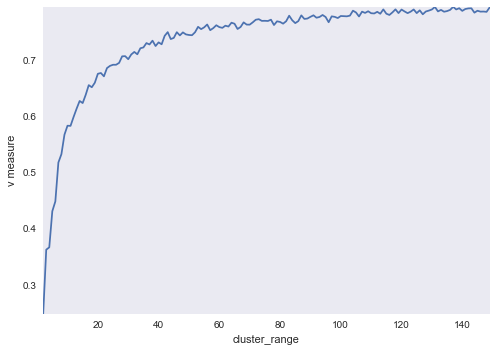

In [28]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

X = busstop_df[['x', 'y']]
y = busstop_df['busno']
cluster_range = range(2, 150)
vmeasures = []

for n_cluster in cluster_range:
    km = KMeans(init='k-means++', n_clusters=n_cluster, n_init=10)
    km.fit(X)
    vmeasures.append(metrics.v_measure_score(y, km.labels_))
    
# 최적의 군집수 시각화(best_cluster)
plt.plot(cluster_range, vmeasures)
    
plt.xlabel('cluster_range')
plt.ylabel('v measure')
plt.autoscale(tight=True)
plt.grid()
plt.show()

### 2. 군집화(Clustering) 후 시각화
- 위의 결과에 따라 **best_clusters = 40**으로 clustering을 함

In [29]:
best_clusters = 40
km = KMeans(init='k-means++', n_clusters=best_clusters, n_init=10)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=40, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [30]:
km.cluster_centers_

array([[ 126.92237195,   37.56333395],
       [ 127.06110518,   37.58915727],
       [ 126.9822155 ,   37.49293243],
       [ 127.08902127,   37.51045673],
       [ 126.4512925 ,   37.448464  ],
       [ 126.90860971,   37.48369514],
       [ 126.97579829,   37.564205  ],
       [ 127.17259862,   37.56219675],
       [ 126.8426795 ,   37.50631225],
       [ 126.92567708,   37.51711281],
       [ 127.02669791,   37.63124364],
       [ 127.01832183,   37.50646317],
       [ 127.109774  ,   37.50276467],
       [ 126.9501635 ,   37.4762735 ],
       [ 127.09707871,   37.60781014],
       [ 126.96825533,   37.53322342],
       [ 127.03301113,   37.57474687],
       [ 126.88748025,   37.54382975],
       [ 126.910492  ,   37.64499575],
       [ 126.94265176,   37.556629  ],
       [ 127.03674075,   37.482568  ],
       [ 126.8545726 ,   37.5506661 ],
       [ 127.06369157,   37.50550229],
       [ 126.89587362,   37.51669254],
       [ 127.02327032,   37.60233336],
       [ 126.931838  ,   

### 군집(cluster)의 중심을 시각화

In [31]:
centers = pd.DataFrame(km.cluster_centers_, columns=['x', 'y'])

busstops = generate_busstops(centers)
busroutes = ''
    
data = {'busstops': busstops, 'busroutes': busroutes}
generate_template_html(data, 'cluster_centers.html')

![Alt Text](clusters_centers.png)

# 6. 홀로 떨어진 빈도수 높은 버스 정거장 찾기(Outlier)

### 1. DBSCAN(Density-based spatial clustering of applications with noise)으로 이상치(Outlier) 찾기

- DBSCAN은 밀도 기반 공간 군집 알고리즘이며, 노이즈를 포함한 공간 데이터를 다루는데 적합함
- [wikipedia](http://en.wikipedia.org/wiki/DBSCAN)
- **홀로 떨어진 버스 정거장은 kmeans-clustering의 중앙점(centroid)에 영향을 미침. 이러한 Outlier를 찾아야 함**

>DBSCAN(eps=eps, min_samples=min_samples)
알고리즘의 입력 값은 eps과 min_samples이다.
* eps : 두 인스턴스 최대 허용 거리이며, 이 거리 이내에 있는 instance는 neighborhood이라 한다.
* min_samples : 군집이 형성하기 위해 필요한 최소의 인스턴스 개수
* 군집을 형성하기 위해서는 min_samples 개수 보다 커야 한다. eps-neighborhood은 한 instance에서 거리 eps 이내에 있는 이웃 instance로서, eps-neighborhood의 개수가 min_samples 보다 크면 군집으로 형성되며, 반대로 작으면 노이즈로 취급
* 장점 : kmeans와 달리 초기 k값이 필요하지 않고 일부 인스턴스를 노이즈로 취급함, 비선형으로 떨어진 군집을 찾을 수 있음 
* 단점 : eps, min_samples을 찾기가 쉽지 않음

In [32]:
from collections import namedtuple
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.cluster import DBSCAN

- **입력값을 표준화(Standardization)**

In [33]:
# X.x : X 행렬의 x column

X['sx'] = X.x
X['sy'] = X.y

ss = StandardScaler()
X['sx'] = ss.fit_transform(X.sx)
X['sy'] = ss.fit_transform(X.sy)

C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Leo\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a 

In [34]:
print(X)

                x          y        sx        sy
2371   127.040748  37.658942  0.763456  2.549933
2372   127.038155  37.654567  0.731917  2.456865
2373   127.034752  37.648824  0.690525  2.334697
2374   127.032652  37.645293  0.664983  2.259583
2472   127.028631  37.640697  0.616074  2.161815
2473   127.032464  37.644663  0.662696  2.246182
2474   127.034483  37.648063  0.687253  2.318508
2475   127.038064  37.654070  0.730810  2.446293
2476   127.040545  37.658272  0.760987  2.535680
7154   127.038676  37.477767  0.738254 -1.304128
8303   127.035847  37.482522  0.703844 -1.202977
9183   127.036825  37.481871  0.715740 -1.216825
9431   127.032993  37.486897  0.669130 -1.109909
9432   127.031011  37.491043  0.645023 -1.021713
9433   127.029163  37.494957  0.622545 -0.938452
9434   127.026418  37.500757  0.589157 -0.815071
9435   127.023755  37.506324  0.556766 -0.696647
9436   127.020642  37.512930  0.518902 -0.556120
9486   127.020057  37.513937  0.511786 -0.534699
9487   127.023012  3

### GridSearch : Best_parameter 찾기(최적의 eps, min_samples)

In [35]:
# namedtuple(typename, field_names[, verbose=False][, rename=False])
# Point = namedtuple('Point', ['x', 'y'], verbose=True)

Param = namedtuple('Param', ['eps', 'min_samples'])
params = [Param(0.50, 4), Param(0.35, 4), Param(0.40, 4), Param(0.45, 4), 
          Param(0.50, 5), Param(0.35, 5), Param(0.40, 5), Param(0.45, 5), 
          Param(0.50, 6), Param(0.35, 6), Param(0.40, 6), Param(0.45, 6),
          Param(0.34, 5), Param(0.31, 5), Param(0.32, 5), Param(0.33, 5)
          ]

for param in params:
    dbscan = DBSCAN(eps=param.eps, min_samples=param.min_samples).fit(X[['sx', 'sy']].values)
    labels = dbscan.labels_
    outliers = X[labels == -1]
    
    print(param)
#    print(labels)
#    print(outliers)
    print(metrics.silhouette_score(X, labels, metric='euclidean'))

Param(eps=0.5, min_samples=4)
0.196778000865
Param(eps=0.35, min_samples=4)
0.196778000865
Param(eps=0.4, min_samples=4)
0.196778000865
Param(eps=0.45, min_samples=4)
0.196778000865
Param(eps=0.5, min_samples=5)
0.263888989249
Param(eps=0.35, min_samples=5)
0.263888989249
Param(eps=0.4, min_samples=5)
0.263888989249
Param(eps=0.45, min_samples=5)
0.263888989249
Param(eps=0.5, min_samples=6)
0.263888989249
Param(eps=0.35, min_samples=6)
0.243252778642
Param(eps=0.4, min_samples=6)
0.263888989249
Param(eps=0.45, min_samples=6)
0.263888989249
Param(eps=0.34, min_samples=5)
0.263888989249
Param(eps=0.31, min_samples=5)
0.0163951216619
Param(eps=0.32, min_samples=5)
0.0911640790261
Param(eps=0.33, min_samples=5)
0.0911640790261


* **Best_paramer : eps = 0.34, min_samples = 5**

### 2. 이상치(outlier) 시각화
* **다른 정거장과 군집화되지 못하고 따로 떨어진 정거장을 제거하여 kmeans-Cluster를 구하면 성능이 개선됨**

In [36]:
best_param = Param(eps=0.34, min_samples=5)
dbscan = DBSCAN(eps=best_param.eps, min_samples=best_param.min_samples).fit(X[['sx', 'sy']].values)
labels = dbscan.labels_
outliers = X[labels == -1]

busstops = generate_busstops(outliers)
busroutes = ''
    
data = {'busstops': busstops, 'busroutes': busroutes}
generate_template_html(data, 'cluster_outlier.html')

![Alt Text](outlier.png)

In [37]:
print(outliers)

                x          y        sx        sy
10403  126.451199  37.448409 -6.407379 -1.928649
10524  126.451386  37.448519 -6.405105 -1.926309
23887  126.803103  37.562247 -2.127081  0.492980
23888  126.801342  37.565173 -2.148500  0.555224
26206  126.907937  37.646525 -0.851958  2.285791
26279  126.905649  37.646880 -0.879787  2.293343
26280  126.913375  37.643646 -0.785814  2.224547
26283  126.915007  37.642932 -0.765964  2.209359
27177  126.930311  37.601253 -0.579817  1.322739
27178  126.934804  37.600836 -0.525168  1.313868
27205  126.930399  37.601375 -0.578747  1.325334


In [38]:
busstop_df

,busno,busid,stationid,stationnm,x,y
2371,160,100100033,10011,도봉보건소,127.040748,37.658942
2372,160,100100033,10013,도봉구민회관,127.038155,37.654567
2373,160,100100033,10015,쌍문역,127.034752,37.648824
2374,160,100100033,10017,우이1교앞,127.032652,37.645293
2472,160,100100033,09002,수유3동우체국,127.028631,37.640697
2473,160,100100033,10018,우이1교앞,127.032464,37.644663
2474,160,100100033,10016,쌍문역,127.034483,37.648063
2475,160,100100033,10014,도봉구민회관,127.038064,37.654070
2476,160,100100033,10012,도봉보건소.북한산아이파크아파트,127.040545,37.658272
7154,471,100100074,22002,교육개발원입구,127.038676,37.477767


In [39]:
busstop_df.drop([10403, 10524, 23887, 23888, 26206, 26279, 26280, 26283, 27177, 27178, 27205], inplace=True)

C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
busstop_df

,busno,busid,stationid,stationnm,x,y
2371,160,100100033,10011,도봉보건소,127.040748,37.658942
2372,160,100100033,10013,도봉구민회관,127.038155,37.654567
2373,160,100100033,10015,쌍문역,127.034752,37.648824
2374,160,100100033,10017,우이1교앞,127.032652,37.645293
2472,160,100100033,09002,수유3동우체국,127.028631,37.640697
2473,160,100100033,10018,우이1교앞,127.032464,37.644663
2474,160,100100033,10016,쌍문역,127.034483,37.648063
2475,160,100100033,10014,도봉구민회관,127.038064,37.654070
2476,160,100100033,10012,도봉보건소.북한산아이파크아파트,127.040545,37.658272
7154,471,100100074,22002,교육개발원입구,127.038676,37.477767


## 이상치(Outlier) 제거 후 군집화(Clustering)

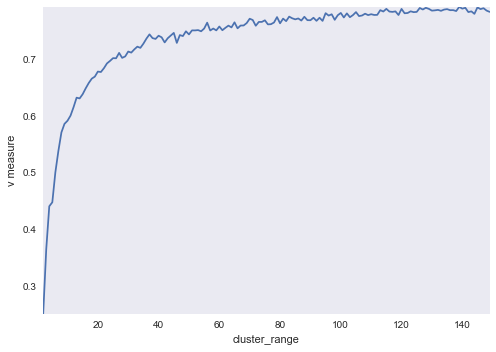

In [41]:
X = busstop_df[['x', 'y']]
y = busstop_df['busno']
cluster_range = range(2, 150)
vmeasures = []

for n_cluster in cluster_range:
    km = KMeans(init='k-means++', n_clusters=n_cluster, n_init=10)
    km.fit(X)
    vmeasures.append(metrics.v_measure_score(y, km.labels_))
    
# 최적의 군집수 시각화(best_cluster)
plt.plot(cluster_range, vmeasures)
    
plt.xlabel('cluster_range')
plt.ylabel('v measure')
plt.autoscale(tight=True)
plt.grid()
plt.show()

### best_cluster = 40

In [42]:
best_clusters = 40
km = KMeans(init='k-means++', n_clusters=best_clusters, n_init=10)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=40, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [43]:
centers = pd.DataFrame(km.cluster_centers_, columns=['x', 'y'])

busstops = generate_busstops(centers)
busroutes = ''
    
data = {'busstops': busstops, 'busroutes': busroutes}
generate_template_html(data, 'cluster_cectroid_out.html')

![Alt Text](centroid_out.png)

## 군집(Cluster)의 중심점(centroid) 위치 확인
* 신논현역과 CGV강남점 사이에 위치
* 대학로 근방에 위치
* 경동시장과 청량리역 근방에 위치
* 이 밖에 연남동, 신촌 근방에 위치
### → 군집의 중심(centroid)은 유동인구가 많은 곳이라는 것을 확인

![Alt Text](gang.png)

![Alt Text](dae.png)

![Alt Text](gyung.png)

## ※ 군집 중앙(Centroid) 활용방안
* **centroid에 wifi 중계소나 광대역 wifi를 설치한다면 버스 이동 간 wifi가 끊기는 문제점을 보완할 수 있을 것으로 보임**

# 7. mean shift 적용

> Mean Shift : 어떤 데이터 분포의 peak 또는 무게중심을 찾는 한 방법으로서, 현재 자신의 주변에서 가장 데이터가 밀집된 방향으로 이동함
* 분포 중심을 찾을 수 있는 방법

![Alt Text](mean_shift.png)

In [44]:
from sklearn.cluster import MeanShift, estimate_bandwidth

import pandas as pd

bus_df = df1

mbus_df = bus_df[bus_df['stationid']!='0']
mbus_df = mbus_df[mbus_df['stationid']!=u'미정차']
mbus_df = mbus_df[mbus_df['stationid']!='35331']

N = 8

stops = mbus_df['stationid'].value_counts()
d = stops[stops > N].index.values.tolist()
mbus_df = mbus_df[mbus_df['stationid'].isin(d)]
busstop_df = mbus_df.drop_duplicates(cols='stationid', take_last=True)
# busstop_df
X = busstop_df[['x', 'y']]
y = busstop_df['busno']

print(X.shape)
bandwidth = estimate_bandwidth(X.values, quantile=0.5, n_samples=30)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X.values)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(ms.cluster_centers_)

(514, 2)
number of estimated clusters : 2
[[ 126.94523539   37.52962489]
 [ 126.4512925    37.448464  ]]


C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
C:\Users\Leo\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: the 'cols' keyword is deprecated, use 'subset' instead


In [45]:
centers = pd.DataFrame(ms.cluster_centers_, columns=['x', 'y'])

busstops = generate_busstops(centers)
busroutes = ''
# i = 0
# for idx, row in busstop_df.iterrows():
#     route = bus_df[bus_df['busno']==row['busno']]
#     busroutes += generate_polyline('poly' + str(i), route, i)
#     i += 1
    
data = {'busstops': busstops, 'busroutes': busroutes}
generate_template_html(data, 'cluster_centroid_meanshift.html')

![Alt Text](mean_shift_0.png)

### ▶ 유동인구가 많은 버스 정류장의 분포 : 용산과 여의도에 밀집되어 있음
- **유동인구가 많은 버스정류장이 용산과 여의도에 더 밀집되어 있으므로 이 곳에 wifi 중계소를 더 설치할 필요가 있음**